### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

plt.style.use('seaborn')

### Load and Read Dataset

In [2]:
df = pd.read_csv('boston_housing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df.isnull().any()

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
b          False
lstat      False
medv       False
dtype: bool

karena tidak ada data null, maka tidak perlu dilakukan tahapan <i>handling missing value</i> pada saat data preparation.

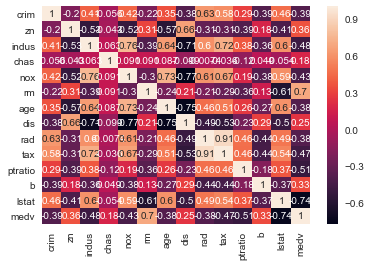

In [5]:
sns.heatmap(data=df.corr(), annot=True)
plt.show()

medv sebagai target, feature yang memiliki korelasi <b>strong positive</b> dan <b>strong negative</b> adalah rm (jumlah kamar), zn (proporsi tanah), ptratio (rasio p-t perkota), dan indus (proporsi hektar bisnis).

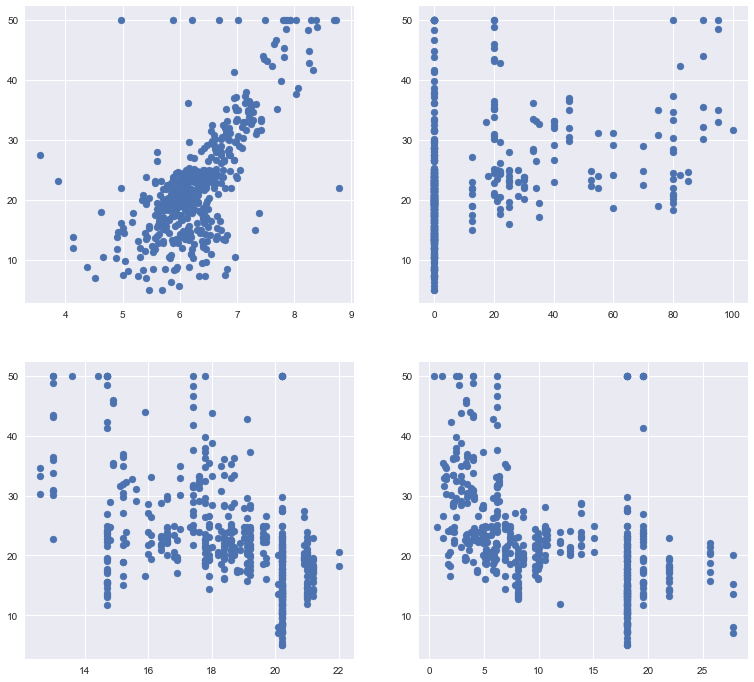

In [6]:
f = plt.figure(figsize=(20,12))

#visualisasi rm
f.add_subplot(2,3,1)
plt.scatter(data=df, x='rm', y='medv')

#visualisasi zn
f.add_subplot(2,3,2)
plt.scatter(data=df, x='zn', y='medv')

#visualisasi ptratio
f.add_subplot(2,3,4)
plt.scatter(data=df, x='ptratio', y='medv')

#visualisasi indus
f.add_subplot(2,3,5)
plt.scatter(data=df, x='indus', y='medv')

plt.show()

### Data Preparation

<b>1. Mengubah tipe data rm, karena jumlah kamar tidak mungkin float</b>

In [7]:
df['rm'] = df['rm'].astype('int64')
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm           int64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

<b>2. Mengubah data categorical (chas) dengan menggunakan one hot encoder</b>

In [8]:
chas_dummies = pd.get_dummies(df['chas'], prefix='chas')

In [9]:
chas_dummies.head()

,chas_0,chas_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [10]:
#Menggabungkan data hasil one hot encoder ke dalam dataframe
df_boston = pd.concat([df, chas_dummies], axis=1)
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,chas_0,chas_1
0,0.00632,18.0,2.31,0,0.538,6,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0,0.469,6,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0,0.469,7,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0,0.458,6,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0,0.458,7,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,0


In [11]:
#Menghapus data chas yang asli karena sudah dilakukan pemisahan
del df_boston['chas']

In [12]:
df_boston.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,chas_0,chas_1
0,0.00632,18.0,2.31,0.538,6,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.458,6,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.458,7,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,0


Data chas tidak memiliki korelasi yang signifikan, oleh karena itu tidak digunakan untuk tahapan selanjutnya.

### Data Modeling (Simple Linear Regression)

<b>1. Definisi variabel dependen dan independen</b>

In [13]:
x = df_boston[['rm']]

y = df_boston['medv']

<b>2. Split data untuk train dan test</b>

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)

<b>3. Train data</b>

In [15]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
x_train[0:5]

,rm
412,4
195,7
197,7
92,6
146,5


In [17]:
y_predict = lr.predict(x_train)
y_predict[0:5]

array([ 9.51611553, 31.83833959, 31.83833959, 24.39759824, 16.95685688])

In [18]:
akurasi = lr.score(x_train, y_train)
print(f'Nilai akurasi data training adalah: {akurasi * 100:.2f}%')

Nilai akurasi data training adalah: 37.85%


C:\Users\Nugi G. Yasa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Nugi G. Yasa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


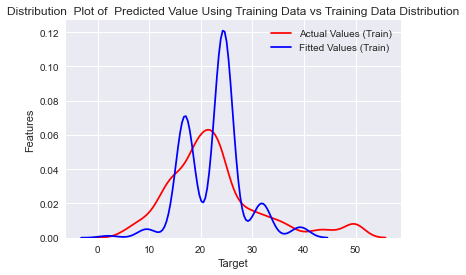

In [19]:
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Values (Train)")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values (Train)" , ax=ax1)


plt.title('Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution')
plt.xlabel('Target')
plt.ylabel('Features')

plt.show()

<b>4. Test data</b>

In [20]:
x_test[0:5]

,rm
337,5
30,5
364,8
240,6
162,7


In [21]:
y_predict = lr.predict(x_test)
y_predict[0:5]

array([16.95685688, 16.95685688, 39.27908094, 24.39759824, 31.83833959])

In [22]:
akurasi = lr.score(x_test, y_test)
print(f'Nilai akurasi data training adalah: {akurasi * 100:.2f}%')

Nilai akurasi data training adalah: 41.76%


C:\Users\Nugi G. Yasa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Nugi G. Yasa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


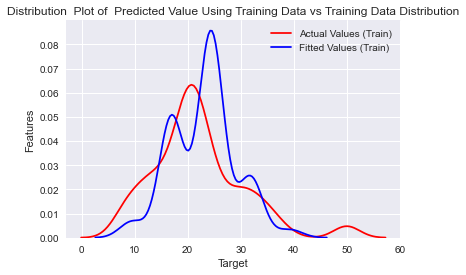

In [23]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Values (Train)")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values (Train)" , ax=ax1)


plt.title('Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution')
plt.xlabel('Target')
plt.ylabel('Features')

plt.show()

<b>5. Kesimpulan</b>

C:\Users\Nugi G. Yasa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


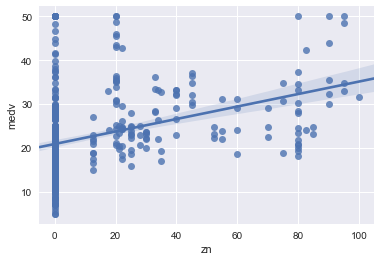

In [24]:
plt.figure(figsize=(6, 4))
sns.regplot(x="zn", y="medv", data=df_boston)
plt.show()

In [25]:
print("Nilai koefisiennya adalah: ", lr.coef_)
print("Nilai intercept-nya adalah: ", lr.intercept_)

Nilai koefisiennya adalah:  [7.44074135]
Nilai intercept-nya adalah:  -20.246849874242383


Persamaan matematikanya ialah: <br/>
<b>medv = 8.95714147 - 33.85503807408293 * rm</b><br/>
karena hasil akurasi train maupun test dibawah 50% maka model ini kurang cocok digunakan untuk memprediksi harga.

### Data Modeling (Multiple Regression)

<b>1. Definisi variabel dependen dan independen</b>

In [26]:
x = df_boston[['rm', 'zn', 'ptratio', 'indus']]

y = df_boston['medv']

<b>2. Split data untuk train dan test</b>

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)

<b>3. Train data</b>

In [28]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
x_train[0:5]

,rm,zn,ptratio,indus
412,4,0.0,20.2,18.10
195,7,80.0,14.4,0.46
197,7,80.0,12.6,1.52
92,6,28.0,18.2,15.04
146,5,0.0,14.7,19.58


In [30]:
y_predict = lr.predict(x_train)
y_predict[0:5]

array([ 9.33588957, 38.0354685 , 39.72694658, 23.38303983, 20.21123672])

In [31]:
akurasi = lr.score(x_train, y_train)
print(f'Nilai akurasi data training adalah: {akurasi * 100:.2f}%')

Nilai akurasi data training adalah: 52.08%


C:\Users\Nugi G. Yasa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Nugi G. Yasa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


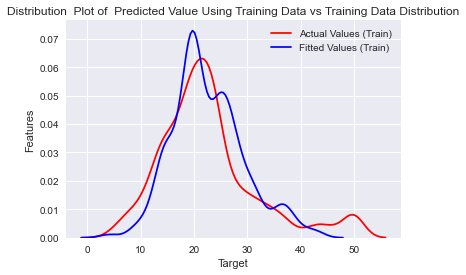

In [32]:
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Values (Train)")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values (Train)" , ax=ax1)


plt.title('Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution')
plt.xlabel('Target')
plt.ylabel('Features')

plt.show()

<b>4. Test data</b>

In [33]:
x_test[0:5]

,rm,zn,ptratio,indus
337,5,0.0,20.2,5.19
30,5,0.0,21.0,8.14
364,8,0.0,20.2,18.10
240,6,30.0,16.6,4.93
162,7,0.0,14.7,19.58


In [34]:
y_predict = lr.predict(x_test)
y_predict[0:5]

array([18.27281947, 16.53010554, 30.12576525, 28.12686968, 30.60617456])

In [35]:
akurasi = lr.score(x_test, y_test)
print(f'Nilai akurasi data training adalah: {akurasi * 100:.2f}%')

Nilai akurasi data training adalah: 52.57%


C:\Users\Nugi G. Yasa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Nugi G. Yasa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


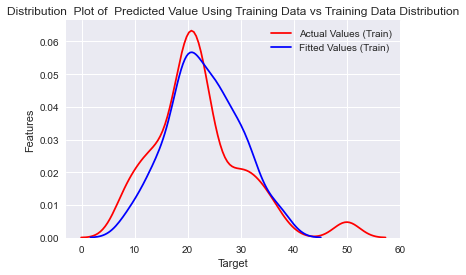

In [36]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Values (Train)")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values (Train)" , ax=ax1)


plt.title('Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution')
plt.xlabel('Target')
plt.ylabel('Features')

plt.show()

<b>5. Kesimpulan</b>

C:\Users\Nugi G. Yasa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Nugi G. Yasa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Nugi G. Yasa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated

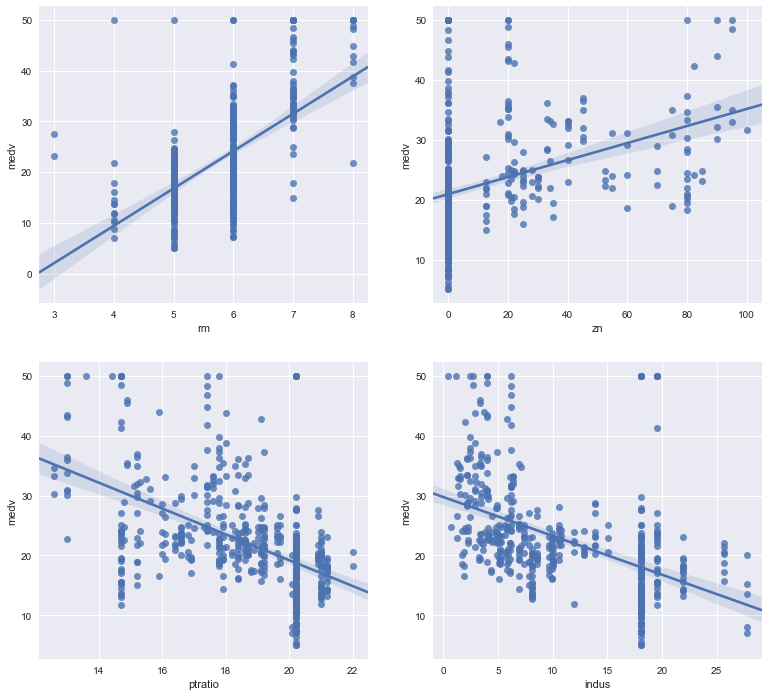

In [37]:
f = plt.figure(figsize=(20,12))

#visualisasi rm
f.add_subplot(2,3,1)
sns.regplot(data=df, x='rm', y='medv')

#visualisasi zn
f.add_subplot(2,3,2)
sns.regplot(data=df, x='zn', y='medv')

#visualisasi ptratio
f.add_subplot(2,3,4)
sns.regplot(data=df, x='ptratio', y='medv')

#visualisasi indus
f.add_subplot(2,3,5)
sns.regplot(data=df, x='indus', y='medv')

plt.show()

In [38]:
print("Nilai koefisiennya adalah: ", lr.coef_)
print("Nilai intercept-nya adalah: ", lr.intercept_)

Nilai koefisiennya adalah:  [ 5.19746892  0.01947478 -1.11028533 -0.28965616]
Nilai intercept-nya adalah:  16.21655408778787


Persamaan matematikanya ialah: <br/>
<b>medv = 16.21655408778787 + 5.19746892 * rm + 0.01947478 * zn - 1.11028533 * ptratio - 0.28965616 * indus </b><br/>
karena hasil akurasi train maupun test diatas 50% maka model ini lebih cocok digunakan untuk memprediksi harga dibandingkan model <b>simple linear regression</b>.